# Capstone Final Project - Part 2

In [1]:
##Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
##Read data file that will be used for the project
df = pd.read_csv('data/flight_delays.csv')
df.head()          

,FlightID,Airline,FlightNumber,Origin,Destination,ScheduledDeparture,ActualDeparture,ScheduledArrival,ActualArrival,DelayMinutes,DelayReason,Cancelled,Diverted,AircraftType,TailNumber,Distance
0,1,United,4558,ORD,MIA,9/1/2024 8:11,9/1/2024 8:30,9/1/2024 12:11,9/1/2024 12:19,8,Weather,True,False,Boeing 737,N71066,1031
1,2,Delta,8021,LAX,MIA,9/1/2024 10:25,9/1/2024 10:41,9/1/2024 13:25,9/1/2024 13:27,2,Air Traffic Control,True,True,Airbus A320,N22657,1006
2,3,Southwest,7520,DFW,SFO,9/1/2024 16:53,9/1/2024 17:05,9/1/2024 17:53,9/1/2024 18:07,14,Weather,True,True,Boeing 737,N95611,2980
3,4,Delta,2046,ORD,BOS,9/1/2024 14:44,9/1/2024 15:04,9/1/2024 18:44,9/1/2024 18:34,-10,NaN,False,False,Boeing 777,N90029,1408
4,5,Delta,6049,LAX,SEA,9/1/2024 1:51,9/1/2024 2:08,9/1/2024 5:51,9/1/2024 6:15,24,Air Traffic Control,False,True,Boeing 737,N27417,2298


In [3]:
##No.of Records and Columns in the file 
df.shape

(239582, 16)

In [23]:
##Structure of the file 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1747627 entries, 0 to 1747626
Data columns (total 16 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   FlightID            int64 
 1   Airline             object
 2   FlightNumber        int64 
 3   Origin              object
 4   Destination         object
 5   ScheduledDeparture  object
 6   ActualDeparture     object
 7   ScheduledArrival    object
 8   ActualArrival       object
 9   DelayMinutes        int64 
 10  DelayReason         object
 11  Cancelled           bool  
 12  Diverted            bool  
 13  AircraftType        object
 14  TailNumber          object
 15  Distance            int64 
dtypes: bool(2), int64(4), object(10)
memory usage: 190.0+ MB


In [4]:
# Dropping the columns as these will not be used for modeling
df = df.drop(columns=['FlightID', 'TailNumber'])

In [6]:
##Find out number of nulls in each column
df.isnull().sum()

Airline                   0
FlightNumber              0
Origin                    0
Destination               0
ScheduledDeparture        0
ActualDeparture           0
ScheduledArrival          0
ActualArrival             0
DelayMinutes              0
DelayReason           63938
Cancelled                 0
Diverted                  0
AircraftType              0
Distance                  0
dtype: int64

In [7]:
## Update missing values NaN with Other reasons
# Fill NaN values in DelayReason with 'Other Reasons'
df['DelayReason'] = df['DelayReason'].fillna('Other Reasons')

In [35]:
# Count NaN value after filling values for Delay Reasons = 'Other Reasons'
nan_counts = df[df['DelayReason'].isna()].groupby('Airline').size().reset_index(name='Count')
nan_counts['DelayReason'] = 'NaN'
nan_counts.shape
nan_counts.head()

,Airline,Count,DelayReason


In [36]:
##Find out number of Unique Airlines in the data set
# Get distinct airlines
distinct_airlines = df['Airline'].unique()

# Print the distinct airlines
print(distinct_airlines)
# Count occurrences of each delay reason by airline, including NaN
delay_counts = df.groupby(['Airline', 'DelayReason']).size().reset_index(name='Count')
delay_counts.head()

['United' 'Delta' 'Southwest' 'American Airlines']


,Airline,DelayReason,Count
0,American Airlines,Air Traffic Control,14603
1,American Airlines,Maintenance,14619
2,American Airlines,Other Reasons,15971
3,American Airlines,Weather,14464
4,Delta,Air Traffic Control,14648


In [11]:
# Combine the counts into a single DataFrame
combined_counts = pd.concat([delay_counts, nan_counts], ignore_index=True)

# Display the unique delay reasons along with their counts for each airline
print("Unique Delay Reasons and their Counts by Airline (including NaN):")
for index, row in combined_counts.iterrows():
    print(f"{row['Airline']} - {row['DelayReason']}: {row['Count']}")


Unique Delay Reasons and their Counts by Airline (including NaN):
American Airlines - Air Traffic Control: 14603
American Airlines - Maintenance: 14619
American Airlines - Other Reasons: 15971
American Airlines - Weather: 14464
Delta - Air Traffic Control: 14648
Delta - Maintenance: 14647
Delta - Other Reasons: 15932
Delta - Weather: 14503
Southwest - Air Traffic Control: 14858
Southwest - Maintenance: 14660
Southwest - Other Reasons: 16101
Southwest - Weather: 14677
United - Air Traffic Control: 14760
United - Maintenance: 14574
United - Other Reasons: 15934
United - Weather: 14631


In [12]:
df.head()

,Airline,FlightNumber,Origin,Destination,ScheduledDeparture,ActualDeparture,ScheduledArrival,ActualArrival,DelayMinutes,DelayReason,Cancelled,Diverted,AircraftType,Distance
0,United,4558,ORD,MIA,9/1/2024 8:11,9/1/2024 8:30,9/1/2024 12:11,9/1/2024 12:19,8,Weather,True,False,Boeing 737,1031
1,Delta,8021,LAX,MIA,9/1/2024 10:25,9/1/2024 10:41,9/1/2024 13:25,9/1/2024 13:27,2,Air Traffic Control,True,True,Airbus A320,1006
2,Southwest,7520,DFW,SFO,9/1/2024 16:53,9/1/2024 17:05,9/1/2024 17:53,9/1/2024 18:07,14,Weather,True,True,Boeing 737,2980
3,Delta,2046,ORD,BOS,9/1/2024 14:44,9/1/2024 15:04,9/1/2024 18:44,9/1/2024 18:34,-10,Other Reasons,False,False,Boeing 777,1408
4,Delta,6049,LAX,SEA,9/1/2024 1:51,9/1/2024 2:08,9/1/2024 5:51,9/1/2024 6:15,24,Air Traffic Control,False,True,Boeing 737,2298


In [37]:
# Convert ScheduledDeparture and ActualDeparture to datetime
df['ScheduledDeparture'] = pd.to_datetime(df['ScheduledDeparture'])
df['ActualDeparture'] = pd.to_datetime(df['ActualDeparture'])

# Calculate delay in minutes
df['DelayMinutes'] = (df['ActualDeparture'] - df['ScheduledDeparture']).dt.total_seconds() / 60

# Find the row with the maximum delay
max_delay_row = df.loc[df['DelayMinutes'].idxmax()]

# Extract relevant information
max_delay_info = {
    'FlightNumber': max_delay_row['FlightNumber'],
    'Route': f"{max_delay_row['Origin']} to {max_delay_row['Destination']}",
    'MaxDelayMinutes': max_delay_row['DelayMinutes'],
    'DelayReason': max_delay_row['DelayReason']
}

# Print the result
print(max_delay_info)


{'FlightNumber': 2737, 'Route': 'ATL to MIA', 'MaxDelayMinutes': 30.0, 'DelayReason': 'Other Reasons'}


In [38]:
# Group by 'Airline' and calculate average distance and total delay
aggregated_data = df.groupby('Airline').agg(
    AverageDistance=('Distance', 'mean'),
    TotalDelay=('DelayMinutes', 'sum')
).reset_index()

# Display the aggregated data
print("Aggregated Data:")
print(aggregated_data)

Aggregated Data:
             Airline  AverageDistance  TotalDelay
0  American Airlines      1549.603349    896369.0
1              Delta      1549.675105    893395.0
2          Southwest      1552.740679    905234.0
3             United      1551.238602    897244.0


In [15]:
##Perform Exploratory Data Analysis
# 1. Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe())



Descriptive Statistics:
        FlightNumber             ScheduledDeparture   
count  239582.000000                         239582  \
mean     5002.976113  2024-09-01 11:59:42.638261760   
min         1.000000            2024-09-01 00:00:00   
25%      2504.000000            2024-09-01 05:59:00   
50%      5003.500000            2024-09-01 12:00:00   
75%      7493.000000            2024-09-01 18:01:00   
max      9999.000000            2024-09-01 23:59:00   
std      2885.350587                            NaN   

                     ActualDeparture   DelayMinutes       Distance  
count                         239582  239582.000000  239582.000000  
mean   2024-09-01 12:14:42.265612288      14.993789    1550.819653  
min              2024-09-01 00:00:00       0.000000     100.000000  
25%              2024-09-01 06:14:00       7.000000     826.000000  
50%              2024-09-01 12:15:00      15.000000    1552.000000  
75%              2024-09-01 18:15:00      23.000000    2276.00000

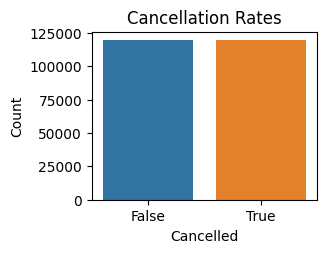

In [40]:
##Visualizations
# Cancellation Rates
plt.subplot(2, 2, 2)
sns.countplot(x='Cancelled', data=df)
plt.title('Cancellation Rates')
plt.xlabel('Cancelled')
plt.ylabel('Count')


# Save the figure in the data folder
plt.savefig('data/Cancellation Rates.png')



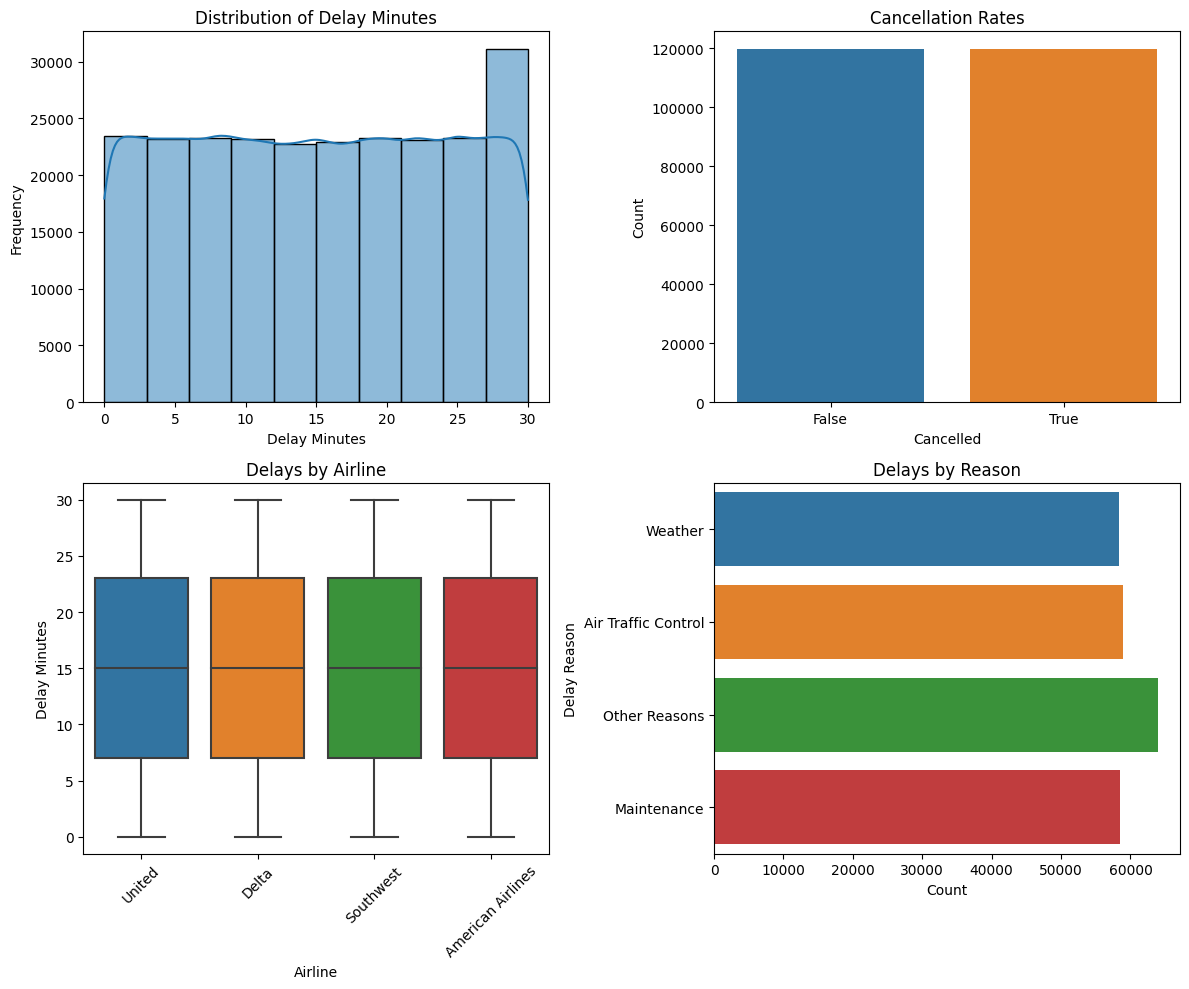

<Figure size 640x480 with 0 Axes>

In [41]:
# Assuming df is your DataFrame containing the flight data

plt.figure(figsize=(12, 10))

# Distribution of Delays
plt.subplot(2, 2, 1)
sns.histplot(df['DelayMinutes'], bins=10, kde=True)
plt.title('Distribution of Delay Minutes')
plt.xlabel('Delay Minutes')
plt.ylabel('Frequency')

# Cancellation Rates
plt.subplot(2, 2, 2)
sns.countplot(x='Cancelled', data=df)
plt.title('Cancellation Rates')
plt.xlabel('Cancelled')
plt.ylabel('Count')

# Delays by Airline
plt.subplot(2, 2, 3)
sns.boxplot(x='Airline', y='DelayMinutes', data=df)
plt.title('Delays by Airline')
plt.xlabel('Airline')
plt.ylabel('Delay Minutes')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Delays by Delay Reason
plt.subplot(2, 2, 4)
sns.countplot(y='DelayReason', data=df)
plt.title('Delays by Reason')
plt.xlabel('Count')
plt.ylabel('Delay Reason')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


# Save the figure in the data folder
plt.savefig('data/flight_delay_distribution2.png')



In [42]:

# Find the longest distance flight by airline
longest_distance_info = df.loc[df.groupby('Airline')['Distance'].idxmax()]

# Extract relevant columns
result = longest_distance_info[['Airline', 'FlightNumber', 'Distance', 'Origin', 'Destination']]

# Print the result
print("Longest Distance Flight by Airline:")
print(result)

Longest Distance Flight by Airline:
                 Airline  FlightNumber  Distance Origin Destination
9672   American Airlines          6841      3000    ATL         BOS
3458               Delta          1055      3000    JFK         BOS
794            Southwest          8028      3000    ATL         MIA
12359             United          3919      3000    LAX         MIA


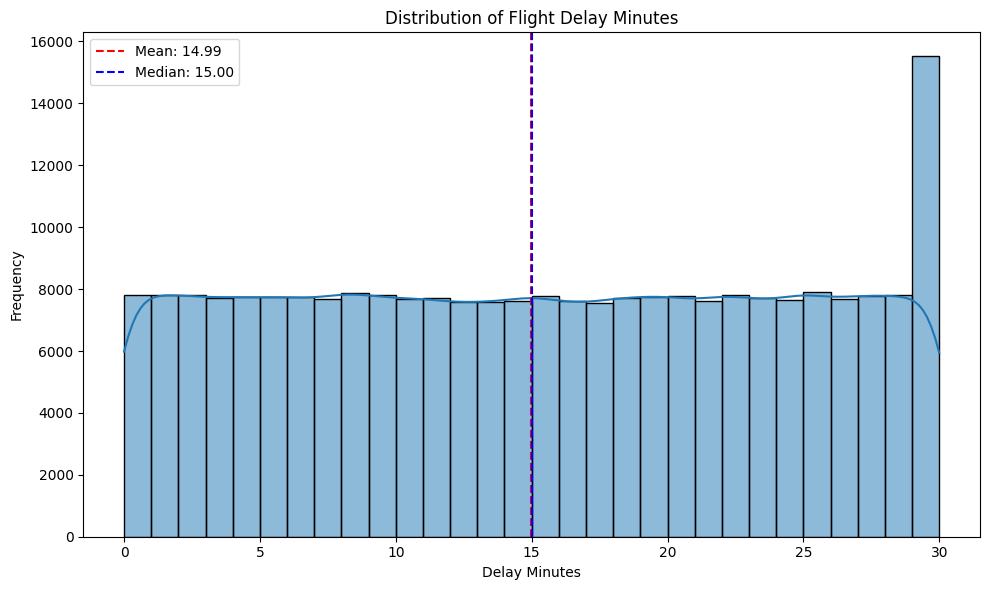

In [43]:
# Plotting the distribution of DelayMinutes
plt.figure(figsize=(10, 6))
sns.histplot(df['DelayMinutes'], bins=30, kde=True)

# Add title and labels
plt.title('Distribution of Flight Delay Minutes')
plt.xlabel('Delay Minutes')
plt.ylabel('Frequency')

# Optional: Add mean or median lines
mean_delay = df['DelayMinutes'].mean()
median_delay = df['DelayMinutes'].median()
plt.axvline(mean_delay, color='red', linestyle='--', label=f'Mean: {mean_delay:.2f}')
plt.axvline(median_delay, color='blue', linestyle='--', label=f'Median: {median_delay:.2f}')

# Add legend
plt.legend()

plt.tight_layout()

# Save the figure in the data folder
plt.savefig('data/flight_delay_distribution.png')

# Show the plot
plt.show()


Numeric Columns: ['FlightNumber', 'DelayMinutes', 'Distance']


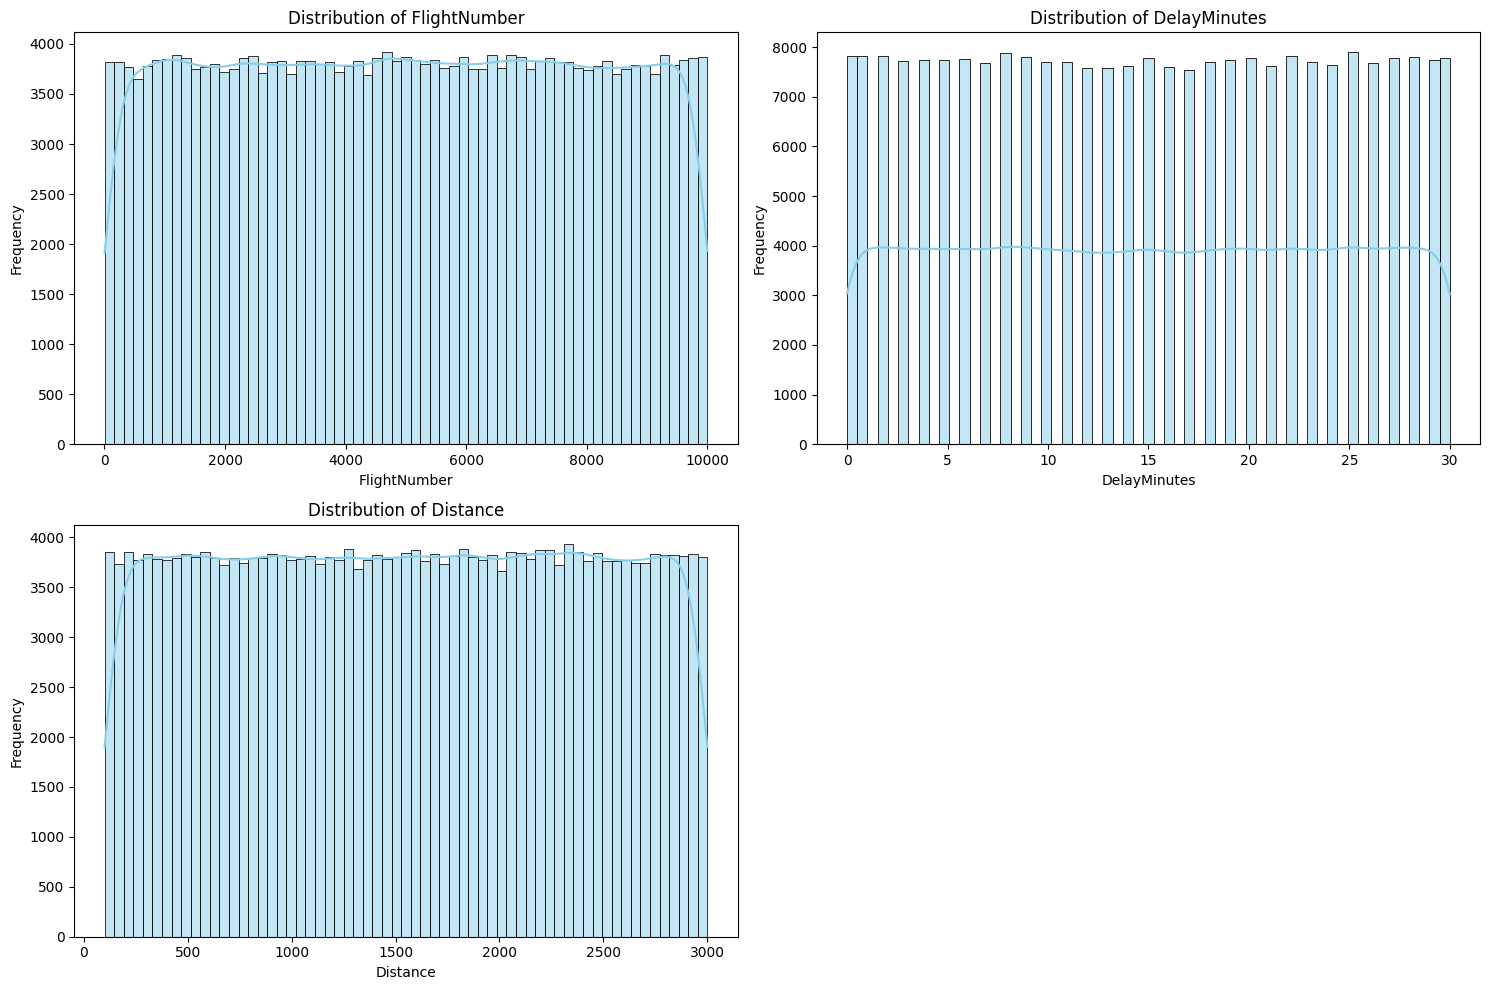

In [20]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
print("Numeric Columns:", numeric_cols)
# Plotting distributions of numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()

# Save the figure in the data folder
plt.savefig('data/numeric_feature_distributions.png')

# Show the plots
plt.show()

Categorical Columns: ['Airline', 'Origin', 'Destination', 'DelayReason', 'AircraftType']


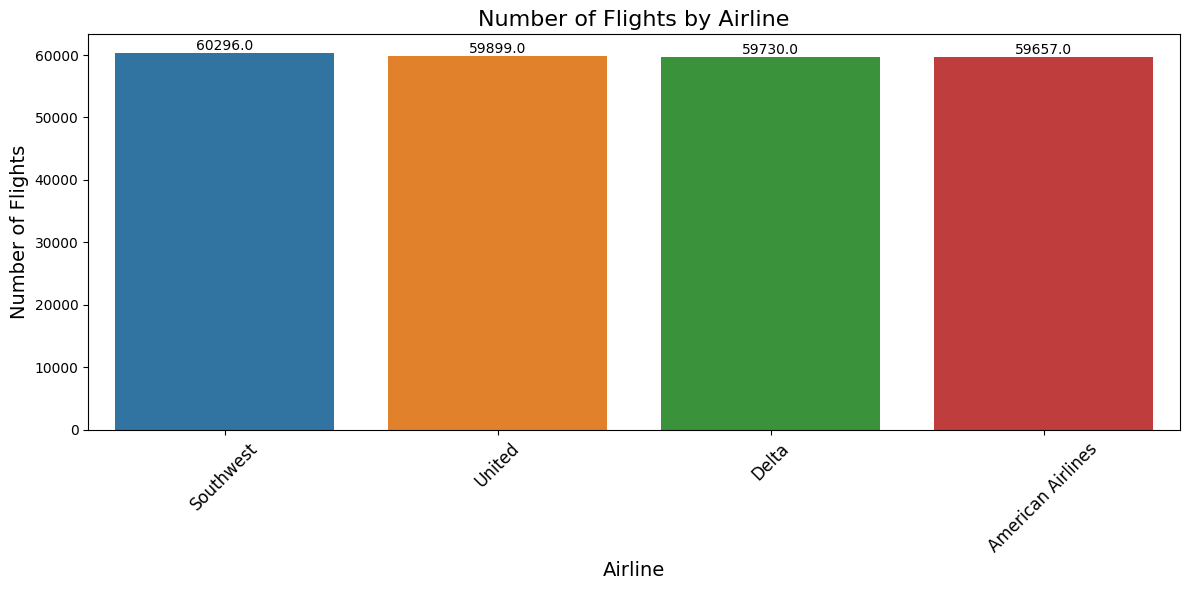

In [44]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_cols)

# Plotting the count of flights by Airline
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Airline', order=df['Airline'].value_counts().index)

# Adding title and labels
plt.title('Number of Flights by Airline', fontsize=16)
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

# Optional: Add data labels above bars
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=10)

plt.tight_layout()

# Save the figure in the data folder
plt.savefig('data/flights_by_airline.png')

# Show the plot
plt.show()

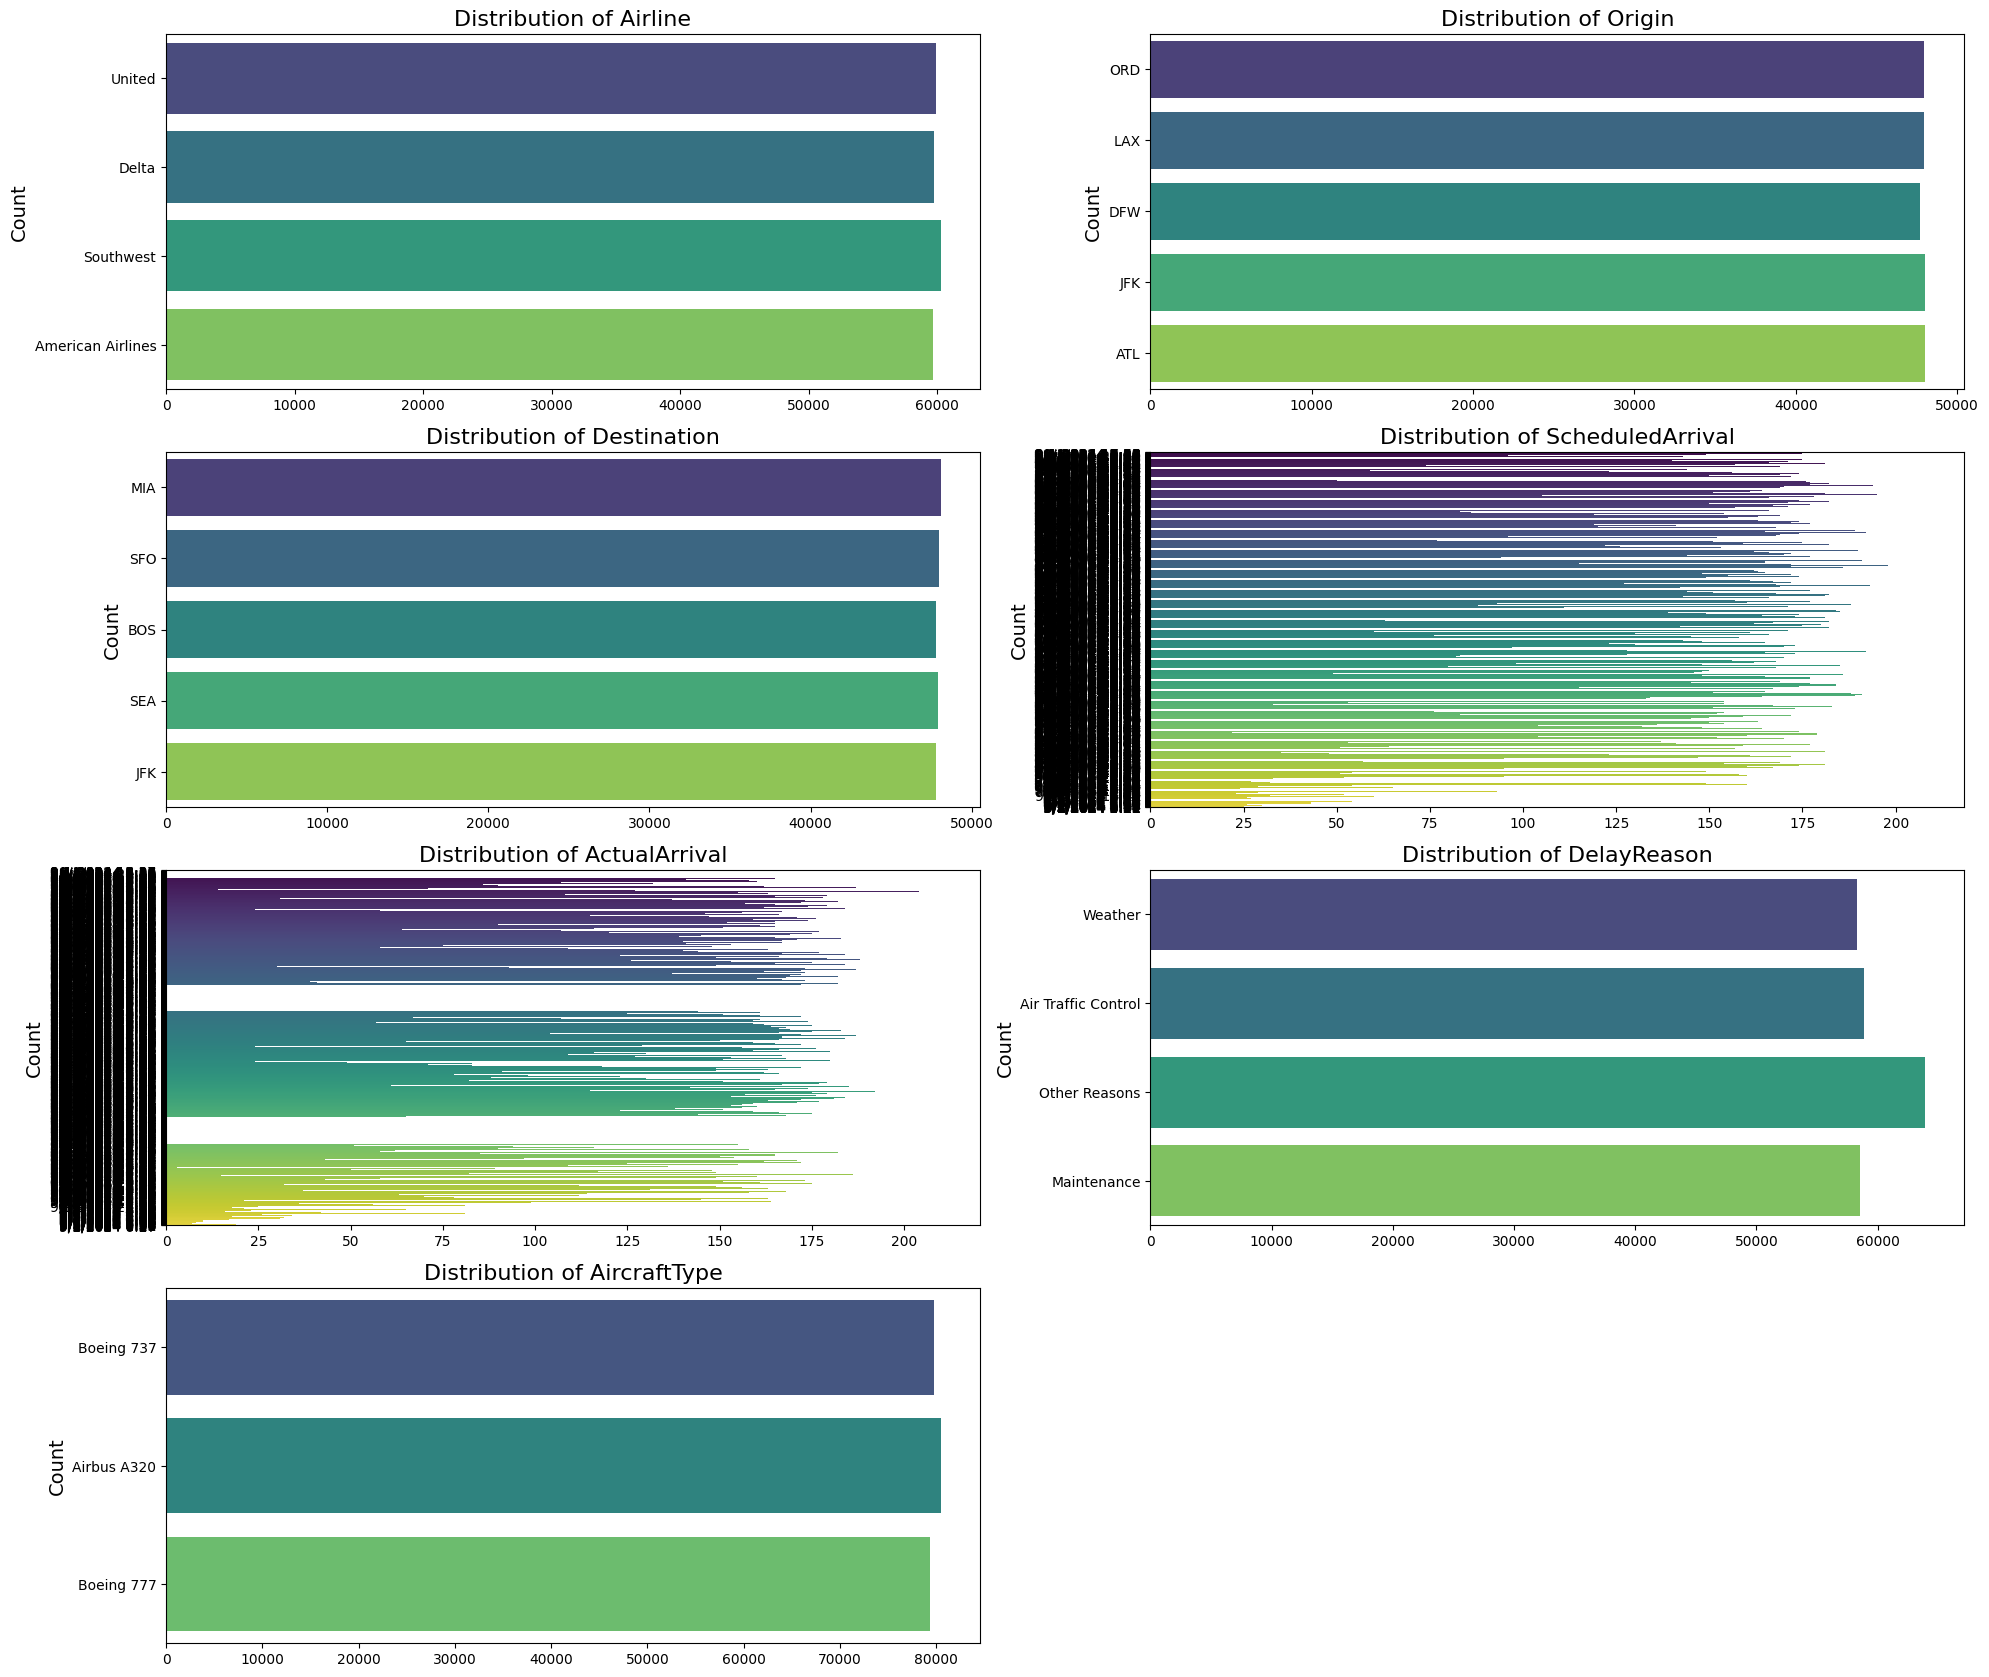

In [22]:
# Plotting distributions of categorical features specific to the airline industry
plt.figure(figsize=(20, 25))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(6, 2, i)
    sns.countplot(y=df[col], palette='viridis')
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel('')
    plt.ylabel('Count', fontsize=14)

plt.tight_layout()

# Save the figure in the data folder
plt.savefig('data/categorical_feature_distributions.png')

# Show the plots
plt.show()

In [45]:
# Identify boolean columns includes True/False values
boolean_cols = df.select_dtypes(include=['bool']).columns.tolist()

# Identify datetime columns includes columns with date and time information
# convert scheduled and actual departure/arrival times to datetime type
df['ScheduledDeparture'] = pd.to_datetime(df['ScheduledDeparture'])
df['ActualDeparture'] = pd.to_datetime(df['ActualDeparture'])
df['ScheduledArrival'] = pd.to_datetime(df['ScheduledArrival'])
df['ActualArrival'] = pd.to_datetime(df['ActualArrival'])

datetime_cols = df.select_dtypes(include=['datetime64[ns]']).columns.tolist()

print("Boolean Columns:", boolean_cols)           
print("Datetime Columns:", datetime_cols)       


Boolean Columns: ['Cancelled', 'Diverted']
Datetime Columns: ['ScheduledDeparture', 'ActualDeparture', 'ScheduledArrival', 'ActualArrival']


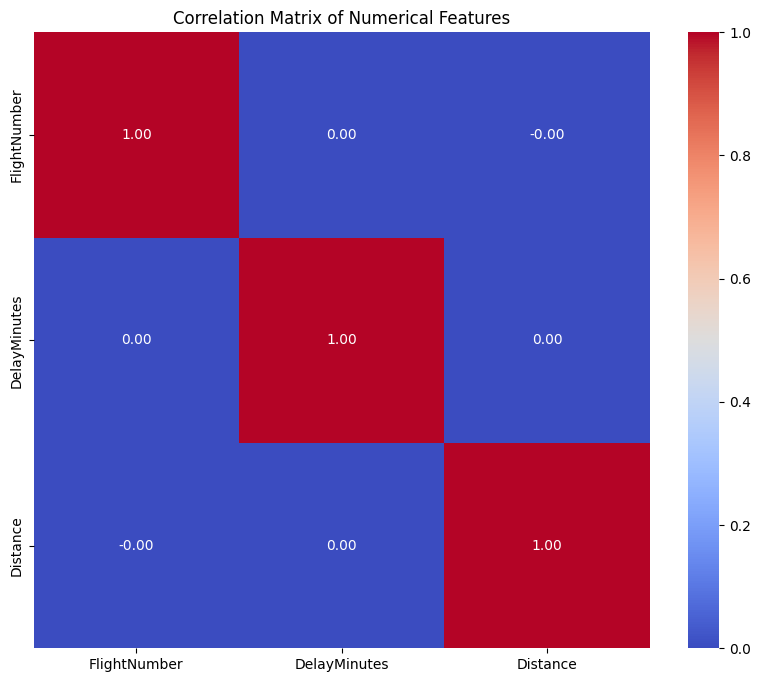

In [24]:
# Correlation Analysis for numerical features
corr_matrix = df[numeric_cols].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numerical Features')

# Save the figure in the data folder
plt.savefig('data/correlation_matrix.png')

plt.show()


In [46]:
df.describe()

# Format values to 2 decimal places
formatted_df = df.describe().copy()

formatted_df.iloc[:, 1:] = formatted_df.iloc[:, 1:].applymap(lambda x: f"{x:.2f}")

# Display the formatted DataFrame
print(formatted_df)



        FlightNumber ScheduledDeparture ActualDeparture ScheduledArrival   
count  239582.000000          239582.00       239582.00        239582.00  \
mean     5002.976113                .2f             .2f              .2f   
min         1.000000                .2f             .2f              .2f   
25%      2504.000000                .2f             .2f              .2f   
50%      5003.500000                .2f             .2f              .2f   
75%      7493.000000                .2f             .2f              .2f   
max      9999.000000                .2f             .2f              .2f   
std      2885.350587                nan             nan              nan   

      ActualArrival DelayMinutes   Distance  
count     239582.00    239582.00  239582.00  
mean            .2f        14.99    1550.82  
min             .2f         0.00     100.00  
25%             .2f         7.00     826.00  
50%             .2f        15.00    1552.00  
75%             .2f        23.00    227

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


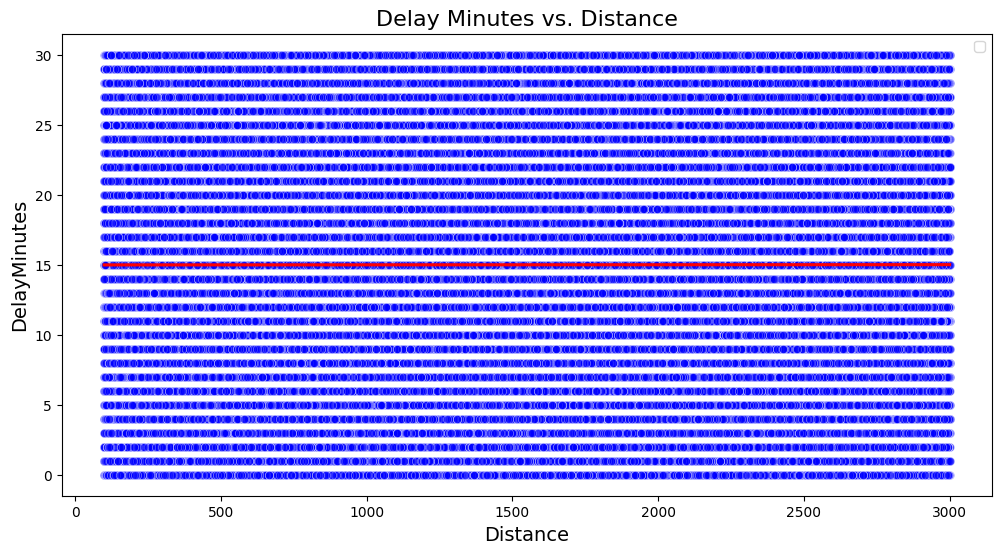

In [47]:
# Create a scatter plot to visualize the relationship between DelayMinutes and Distance
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Distance', y='DelayMinutes', alpha=0.5, color='blue')

# Adding titles and labels
plt.title('Delay Minutes vs. Distance', fontsize=16)
plt.xlabel('Distance (miles)', fontsize=14)
plt.ylabel('Delay Minutes', fontsize=14)

# Optional: Add a regression line to visualize trends
sns.regplot(data=df, x='Distance', y='DelayMinutes', scatter=False, color='red', line_kws={"label": "Regression Line"})

# Add a legend
plt.legend()

# Save the figure in the data folder
plt.savefig('data/delay_vs_distance.png')

# Show the plot
plt.show()

In [50]:
# Calculate the number of cancelled, delayed, diverted, and on-time flights for each airline
cancelled_flights_count = df.groupby('Airline')['Cancelled'].sum().reset_index(name='CancelledCount')

delayed_flights_count = df[df['DelayMinutes'] > 0].groupby('Airline')['DelayMinutes'].count().reset_index(name='DelayedCount')

diverted_flights_count = df.groupby('Airline')['Diverted'].sum().reset_index(name='DivertedCount')

# Calculate on-time flights
ontime_flights_count = df[(df['Cancelled'] == False) & (df['DelayMinutes'] <= 0)].groupby('Airline').size().reset_index(name='OnTimeCount')

# Merge all counts into a single DataFrame
combined_counts = (cancelled_flights_count
                   .merge(delayed_flights_count, on='Airline', how='outer')
                   .merge(diverted_flights_count, on='Airline', how='outer')
                   .merge(ontime_flights_count, on='Airline', how='outer'))

# Display the results
print("Number of Flights Cancelled, Delayed, Diverted, and On-Time by Each Airline:")
print(combined_counts)


Number of Flights Cancelled, Delayed, Diverted, and On-Time by Each Airline:
             Airline  CancelledCount  DelayedCount  DivertedCount  OnTimeCount
0  American Airlines           29961         57771          29972          921
1              Delta           29779         57785          29838          984
2          Southwest           30013         58312          30240         1018
3             United           30017         57893          29975         1008


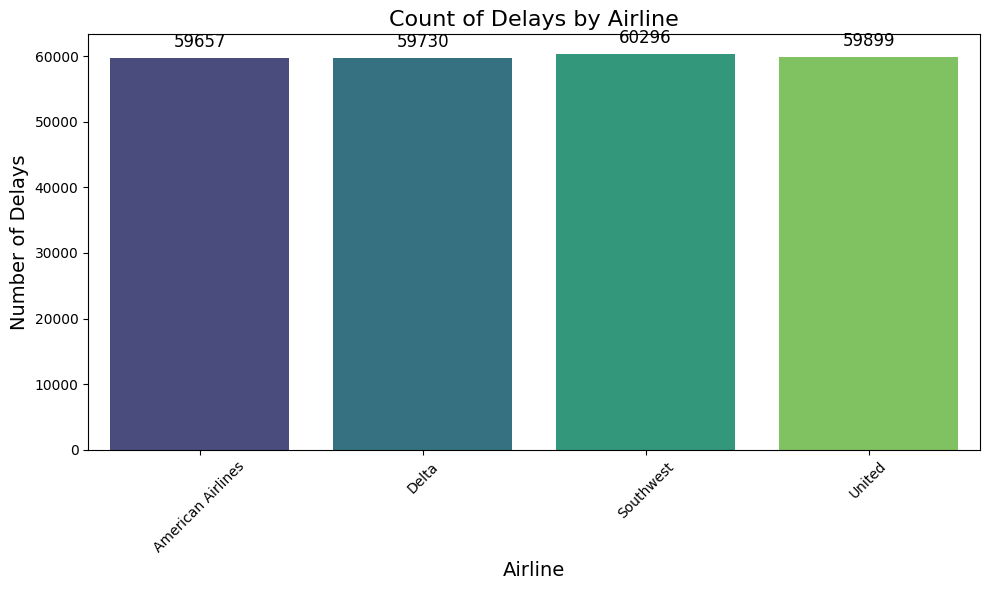

In [49]:
##Use of seaborn 
import seaborn as sns

# Count delays by airline
delay_counts = df.groupby('Airline')['DelayMinutes'].count().reset_index()
delay_counts.columns = ['Airline', 'DelayCount']

# Set up the visualization
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=delay_counts, x='Airline', y='DelayCount', palette='viridis')

# Add titles and labels
plt.title('Count of Delays by Airline', fontsize=16)
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Number of Delays', fontsize=14)
plt.xticks(rotation=45)  # Rotate x labels for better readability

# Add count labels on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=12, color='black', 
                      xytext=(0, 5),  # 5 points vertical offset
                      textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()

In [51]:

# Perform one-hot encoding on categorical columns
df_encoded = pd.get_dummies(df, columns=['Airline', 'Origin', 'Destination', 'DelayReason', 'AircraftType'], drop_first=True)

# Display the encoded DataFrame
print(df_encoded.head())

   FlightNumber  ScheduledDeparture     ActualDeparture    ScheduledArrival   
0          4558 2024-09-01 08:11:00 2024-09-01 08:30:00 2024-09-01 12:11:00  \
1          8021 2024-09-01 10:25:00 2024-09-01 10:41:00 2024-09-01 13:25:00   
2          7520 2024-09-01 16:53:00 2024-09-01 17:05:00 2024-09-01 17:53:00   
3          2046 2024-09-01 14:44:00 2024-09-01 15:04:00 2024-09-01 18:44:00   
4          6049 2024-09-01 01:51:00 2024-09-01 02:08:00 2024-09-01 05:51:00   

        ActualArrival  DelayMinutes  Cancelled  Diverted  Distance   
0 2024-09-01 12:19:00          19.0       True     False      1031  \
1 2024-09-01 13:27:00          16.0       True      True      1006   
2 2024-09-01 18:07:00          12.0       True      True      2980   
3 2024-09-01 18:34:00          20.0      False     False      1408   
4 2024-09-01 06:15:00          17.0      False      True      2298   

   Airline_Delta  ...  Origin_ORD  Destination_JFK  Destination_MIA   
0          False  ...        True

In [52]:
# Initialize LabelEncoders
le_airline = LabelEncoder()
le_origin = LabelEncoder()
le_destination = LabelEncoder()
le_delay_reason = LabelEncoder()
le_aircraft_type = LabelEncoder()

# Fit and transform the categorical columns
df['Airline'] = le_airline.fit_transform(df['Airline'])
df['Origin'] = le_origin.fit_transform(df['Origin'])
df['Destination'] = le_destination.fit_transform(df['Destination'])
df['DelayReason'] = df['DelayReason'].fillna('Unknown')  # Handle NaN values
df['DelayReason'] = le_delay_reason.fit_transform(df['DelayReason'])
df['AircraftType'] = le_aircraft_type.fit_transform(df['AircraftType'])

# Display the encoded DataFrame
print(df.head())

   Airline  FlightNumber  Origin  Destination  ScheduledDeparture   
0        3          4558       4            2 2024-09-01 08:11:00  \
1        1          8021       3            2 2024-09-01 10:25:00   
2        2          7520       1            4 2024-09-01 16:53:00   
3        1          2046       4            0 2024-09-01 14:44:00   
4        1          6049       3            3 2024-09-01 01:51:00   

      ActualDeparture    ScheduledArrival       ActualArrival  DelayMinutes   
0 2024-09-01 08:30:00 2024-09-01 12:11:00 2024-09-01 12:19:00          19.0  \
1 2024-09-01 10:41:00 2024-09-01 13:25:00 2024-09-01 13:27:00          16.0   
2 2024-09-01 17:05:00 2024-09-01 17:53:00 2024-09-01 18:07:00          12.0   
3 2024-09-01 15:04:00 2024-09-01 18:44:00 2024-09-01 18:34:00          20.0   
4 2024-09-01 02:08:00 2024-09-01 05:51:00 2024-09-01 06:15:00          17.0   

   DelayReason  Cancelled  Diverted  AircraftType  Distance  
0            3       True     False             

In [53]:

# Split the dataset into features and target variable
X = df.drop(columns=['DelayMinutes'])  # Features
y = df['DelayMinutes']                  # Target variable

# Create train and test datasets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the results
print("Training Features:\n", X_train)
print("Testing Features:\n", X_test)
print("Training Target:\n", y_train)
print("Testing Target:\n", y_test)


Training Features:
         Airline  FlightNumber  Origin  Destination  ScheduledDeparture   
59203         3          2588       0            0 2024-09-01 01:05:00  \
68719         0          6481       4            0 2024-09-01 03:20:00   
211788        1          7977       4            3 2024-09-01 07:25:00   
119394        3          8802       1            0 2024-09-01 16:41:00   
23318         1          5770       0            3 2024-09-01 21:49:00   
...         ...           ...     ...          ...                 ...   
119879        3          6785       1            1 2024-09-01 09:58:00   
103694        1          3449       0            2 2024-09-01 20:46:00   
131932        3          3866       4            0 2024-09-01 14:42:00   
146867        3          4909       1            3 2024-09-01 16:19:00   
121958        3          9333       0            4 2024-09-01 13:00:00   

           ActualDeparture    ScheduledArrival       ActualArrival   
59203  2024-09-01 01:

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Assume df is your DataFrame after encoding and contains 'ScheduledDeparture'

# Ensure 'ScheduledDeparture' is in datetime format
df['ScheduledDeparture'] = pd.to_datetime(df['ScheduledDeparture'])

# Extracting additional features from ScheduledDeparture
df['ScheduledHour'] = df['ScheduledDeparture'].dt.hour
df['ScheduledDay'] = df['ScheduledDeparture'].dt.dayofweek

# Dropping unnecessary columns
X = df.drop(columns=['DelayMinutes', 'ScheduledDeparture', 'ActualDeparture', 'FlightNumber'])  # Updated features
y = df['DelayMinutes']  # Target variable

# Check the data types of X
print(X.dtypes)

# Dropping any remaining non-numeric columns
X = X.select_dtypes(include=['int64', 'float64'])  # Keep only numeric columns

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Display predictions vs actual values
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions_df)

Airline                      int64
Origin                       int64
Destination                  int64
ScheduledArrival    datetime64[ns]
ActualArrival       datetime64[ns]
DelayReason                  int64
Cancelled                     bool
Diverted                      bool
AircraftType                 int64
Distance                     int64
ScheduledHour                int32
ScheduledDay                 int32
dtype: object
Mean Squared Error: 80.06100067566072
R^2 Score: -4.2082665947074105e-05
        Actual  Predicted
236962     9.0  15.021026
42240     13.0  14.977229
183729    22.0  14.966332
28224     13.0  14.972476
124435    13.0  15.012390
...        ...        ...
70052     18.0  14.988985
191225    23.0  14.935457
232242    21.0  15.036326
223556    11.0  15.073094
94337     13.0  15.073796

[47917 rows x 2 columns]
